In [93]:
# bar chart

In [118]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

In [119]:
df = pd.read_csv("../dataset/titanic/train.csv")

In [120]:
def describe_category(column: pd.Series, chart='pie'):
    """
    Show the dataframe and a chart
    """
    chart_group, spec_group = _create_describe_categories_table_chart_pair(column, chart, limit_category_count=50)
    plot = make_subplots(rows=1, cols=2, specs=[spec_group])
    plot.add_trace(chart_group[0], row=1, col=1)
    plot.add_trace(chart_group[1], row=1, col=2)
    plot.update_layout(height=500, width=1000, showlegend=False)
    return plot

In [121]:
def _create_describe_categories_table(category_describe_df: pd.DataFrame):
    """
    :param category_series:
    """
    # category_df = describe_category_table(category_series)
    table = go.Table(
        header=dict(values=["index"] + list(category_describe_df.columns),
                    fill_color='black',
                    font=dict(color='white'),
                    align='left'),
        cells=dict(values=[category_describe_df.index] +
                          [category_describe_df[column] for column in category_describe_df.columns],
                   # fill_color='lavender',
                   fill=dict(color=['paleturquoise', 'white']),
                   align='left'))
    return table

In [122]:
def _create_describe_categories_table_chart_pair(column: pd.Series, chart: str = "bar", limit_category_count=20):
    """
    :param column: series (example: df["Gender"])
    :param limit_category_count: if total categories > limit, return None
    :return: [chart, table], [spec1, spec2]
    """
    df_category_des = describe_category_table(column)
    trace_table = _create_describe_categories_table(df_category_des)
    if df_category_des.shape[0] > limit_category_count:
        return None, None
    spec_table = {"type": "table"}
    if chart is "bar":
        trace_chart = _create_describe_categories_bar_chart(column, limit_category_count)
        spec_chart = {"type": "xy"}
    elif chart is "pie":
        trace_chart = _create_describe_categories_pie_chart(column, None, limit_category_count)
        spec_chart = {"type": "domain"}
    if trace_chart is None:
        return None, None
    return [trace_chart, trace_table], [spec_chart, spec_table]

<>:12: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:15: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:12: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:15: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<ipython-input-122-7d4b152fe6a6>:12: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<ipython-input-122-7d4b152fe6a6>:15: SyntaxWarning:

"is" with a literal. Did you mean "=="?



In [138]:
def _create_describe_categories_bar_chart(column: pd.Series, limit_category_count=20):
    """
    :param column: series (example: df["Gender"]), or Dataframe output of describe_category_table
    :param limit_category_count: if total categories > limit, return None
    """
    if isinstance(column, pd.Series):
        df_category = describe_category_table(column)
    elif isinstance(column, pd.DataFrame):
        df_category = column
    else:
        raise TypeError("column must be pandas.Series or pandas.DataFrame which is output of describe_category_table")
    if df_category.shape[0] > limit_category_count:
        return None
    n_cates = df_category.shape[0]
    # trace = go.Bar(x=df_category.index, y=df_category['counts'],
    #                width=300 if (n_cates <= 2) else n_cates*max(50, 140*np.power(0.92, n_cates/2)),
    #                orientation='v')
    trace = go.Bar(x=df_category.index, 
                   y=df_category['counts'],
                   text=df_category['percentiles(%)'],
                   textposition='auto',
#                    texttemplate='%{text:.0%}',
                   width=0.4)
    print('trace ',trace)
    return trace

In [139]:
def describe_category_table(column):
    """

    :param column: pandas Series
    :return: DataFrame row: categories, columns: counts, percentiles(%)
    """
    c = column.value_counts(dropna=False)
    p = column.value_counts(dropna=False, normalize=True).map(lambda n: '{0:.2f} %'.format(n * 100))
    return pd.concat([c, p], axis=1, keys=['counts', 'percentiles(%)'])

In [140]:
from plotly.subplots import make_subplots

In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
des = describe_category_table(df["Sex"])
des.head()

,counts,percentiles(%)
male,577,64.76 %
female,314,35.24 %


In [143]:
des["percentiles(%)"]

male      64.76 %
female    35.24 %
Name: percentiles(%), dtype: object

trace  Bar({
    'text': array(['64.76 %', '35.24 %'], dtype=object),
    'textposition': 'auto',
    'width': 0.4,
    'x': array(['male', 'female'], dtype=object),
    'y': array([577, 314])
})


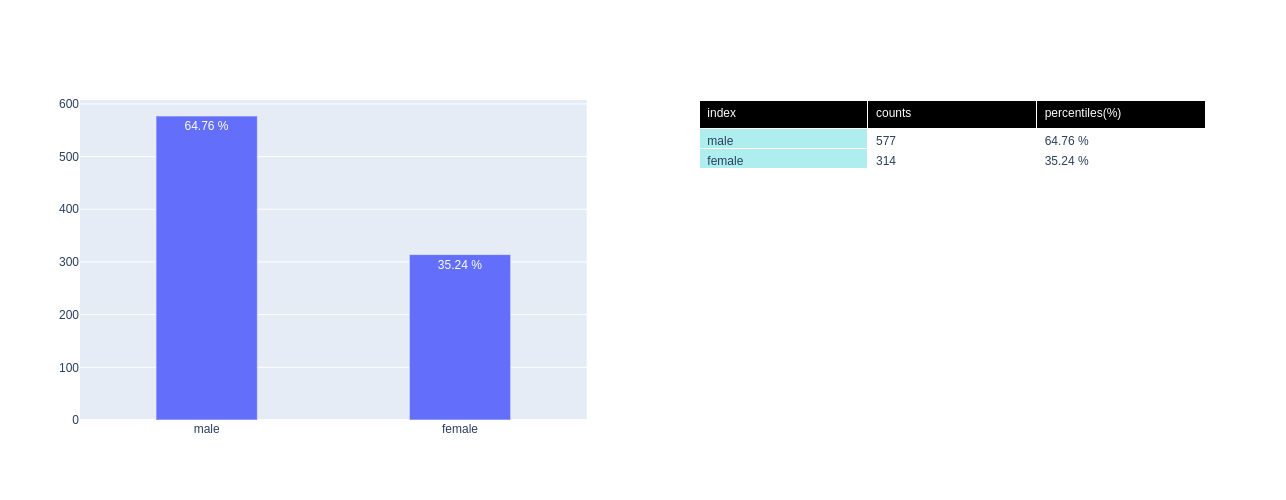

In [144]:
describe_category(df["Sex"], chart="bar")

Bar({
    'width': [0.8, 0.8, 0.8, 3.5, 4], 'x': [1, 2, 3, 5.5, 10], 'y': [10, 8, 6, 4, 2]
})


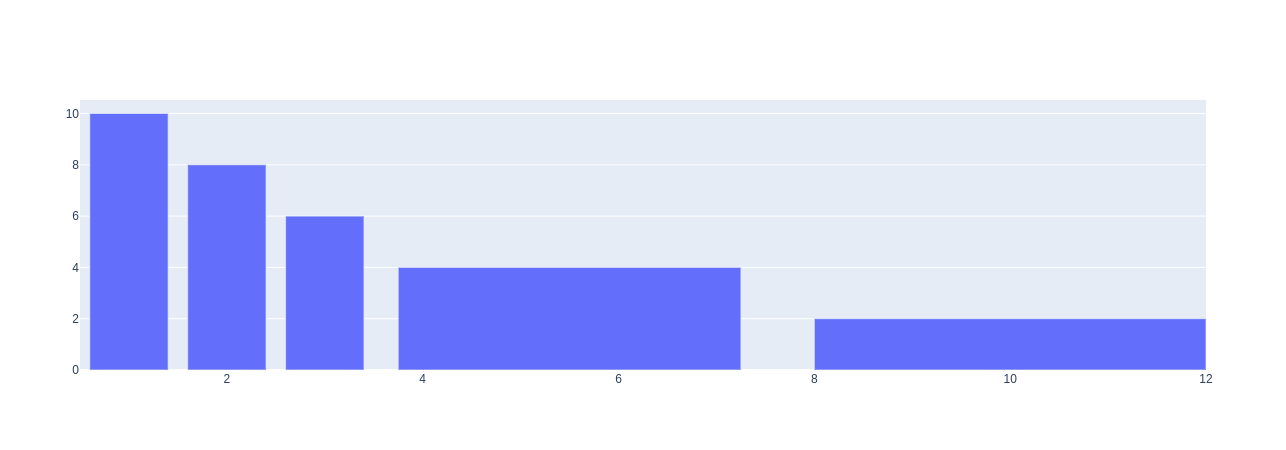

In [145]:
import plotly.graph_objects as go
bar_trace = go.Bar(
    x=[1, 2, 3, 5.5, 10],
    y=[10, 8, 6, 4, 2],
    width=[0.8, 0.8, 0.8, 3.5, 4] # customize width here
)
fig = go.Figure(data=[bar_trace])
print(bar_trace)
fig.show()